## Подключение модулей

In [149]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
%matplotlib inline

## Загрузка данных


In [151]:
# загружаем данные из файла в формате CSV
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [152]:
# выводим первые несколько строк таблицы
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Описание данных

Признаки:

RowNumber – индекс строки в данных
CustomerId – уникальный идентификатор клиента
Surname – фамилия
CreditScore – кредитный рейтинг
Geography – страна проживания
Gender – пол
Age – возраст
Tenure – количество недвижимости у клиента
Balance – баланс на счёте
NumOfProducts -количество продуктов банка, используемых клиентом
HasCrCard – наличие кредитной карты
IsActiveMember – активность клиента
EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:

Exited – факт ухода клиента

## Разведочный анализ данных (РАД, EDA)

In [153]:
# вывод размерности
df.shape

(10000, 14)

In [154]:
# выводим типы данных
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [156]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [157]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
df['Geography']= df['Geography'].map({'France':0, 'Spain':1, 'Germany': 2})
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,2,0,42,3,75075.31,2,1,0,92888.52,1


## Визуальный анализ

<Axes: xlabel='Exited'>

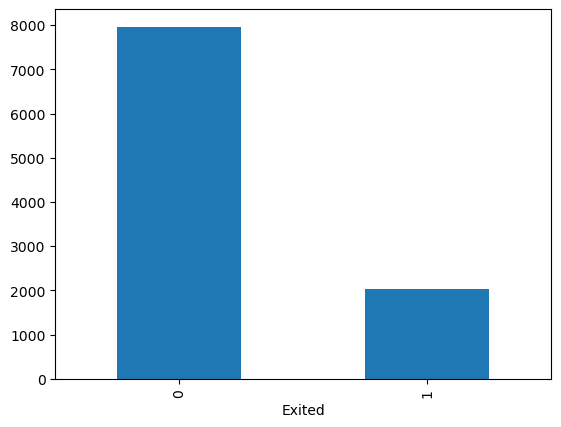

In [158]:
df['Exited'].value_counts(normalize=False).plot.bar()

In [159]:
nDf = df

nDf = nDf.drop('Surname', axis=1)
nDf = nDf.drop('RowNumber', axis=1)
nDf

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [160]:
df['EstimatedSalary'] = df['EstimatedSalary']/ df['EstimatedSalary'].max()
df['Balance'] = df['Balance']/ df['Balance'].max()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.000000,1,1,1,0.506763,1
1,2,15647311,Hill,608,1,1,41,1,0.334031,1,0,1,0.562734,0
2,3,15619304,Onio,502,0,1,42,8,0.636357,3,1,0,0.569679,1
3,4,15701354,Boni,699,0,1,39,1,0.000000,2,0,0,0.469151,0
4,5,15737888,Mitchell,850,1,1,43,2,0.500246,1,1,1,0.395435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.000000,2,1,0,0.481371,0
9996,9997,15569892,Johnstone,516,0,0,35,10,0.228657,1,1,1,0.508518,0
9997,9998,15584532,Liu,709,0,1,36,7,0.000000,1,0,1,0.210436,1
9998,9999,15682355,Sabbatini,772,2,0,42,3,0.299226,2,1,0,0.464460,1


<Axes: >

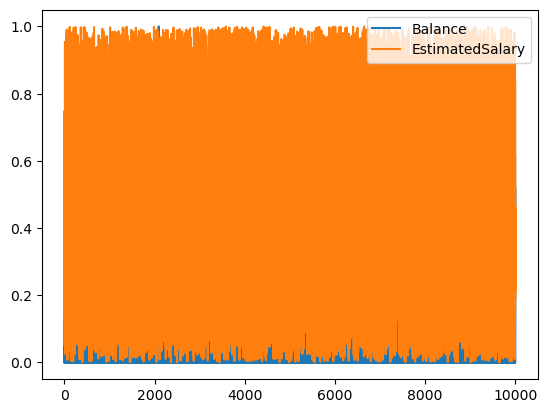

In [161]:
df[['Balance','EstimatedSalary']].plot()

<Axes: >

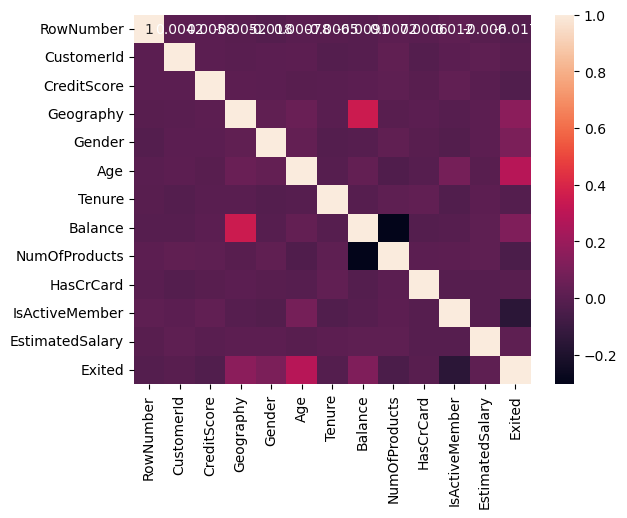

In [162]:
corr = df.corr(numeric_only = True)
sns.heatmap(data=corr,annot=True)

 ## Формирование дата-сета для обучения моделей

In [163]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Geography']

In [164]:
X = df[features_names]
y = df['Exited']

In [165]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

## Modelling

In [166]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [167]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 10) (3300, 10) (6700,) (3300,)


In [168]:
from sklearn.metrics import accuracy_score


## KNeighborsClassifier (Классификация ближайших соседей)

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 15.6 ms


KNeighborsClassifier()

In [171]:
# making prediction
knn.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [172]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [173]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8414925373134329
test accuracy:  0.7951515151515152


In [174]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

## Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [175]:
from sklearn.naive_bayes import GaussianNB

In [176]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 15.6 ms
Wall time: 3.01 ms


GaussianNB()

In [177]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [178]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8357575757575758

In [179]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

## Random Forest Classifier (Классификатор дерева решений)

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 641 ms
Wall time: 187 ms


In [182]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [183]:
# performance measurement
from sklearn.metrics import accuracy_score


In [184]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.8745454545454545

## Метрики классификации

In [185]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [188]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]

In [189]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.795152
1,Gaussian Naive Bayes,0.835758
2,Random Forest Classifier,0.874545


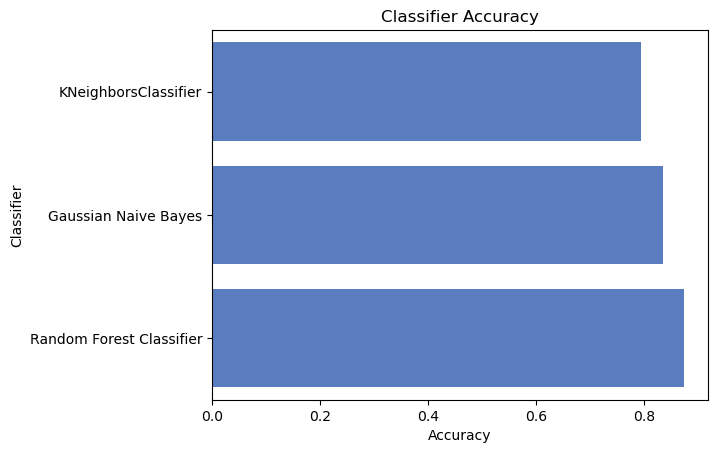

In [190]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

## Confusion matrix (матрица ошибок)

In [191]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [192]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [193]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[2453,  204],
       [ 472,  171]], dtype=int64)

#### Визуализация confusion matrix

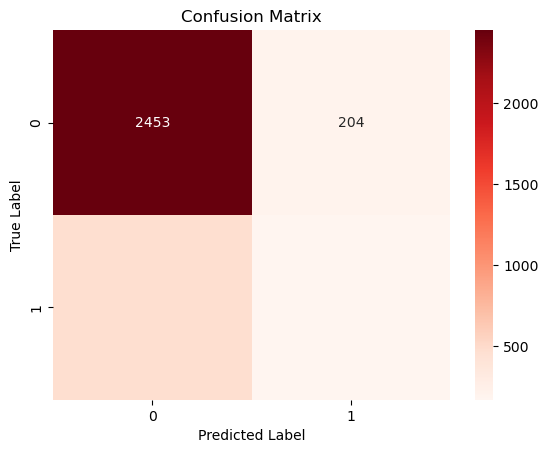

In [194]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

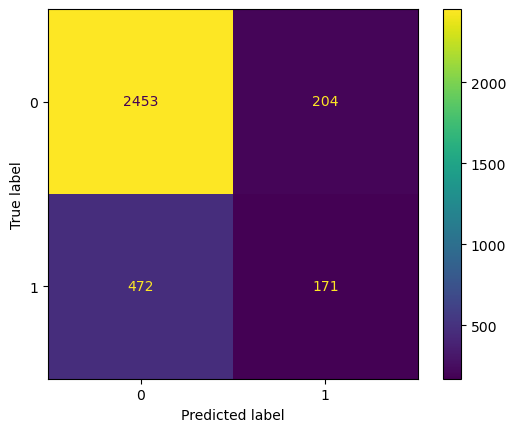

In [195]:
cm = confusion_matrix(y_test, y_test_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

## Accuracy (Точность)

In [196]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8414925373134329
test accuracy:  0.7951515151515152


## Доля ошибочных классификаций (error rate)

In [197]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  0.20484848484848484
test mean_absolute_error:  0.20484848484848484


## Precision (точность)

In [198]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.26594090202177295


## F1-score

In [199]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.33595284872298625


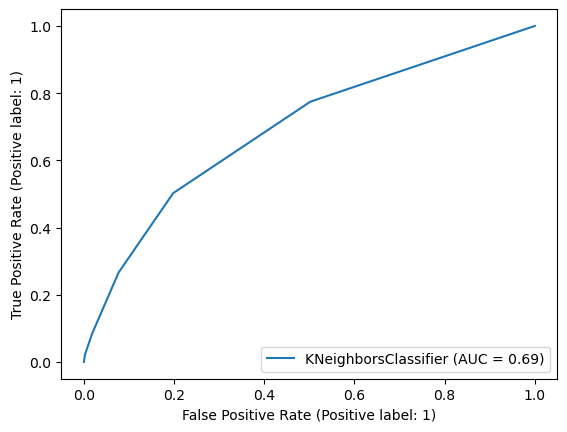

In [200]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

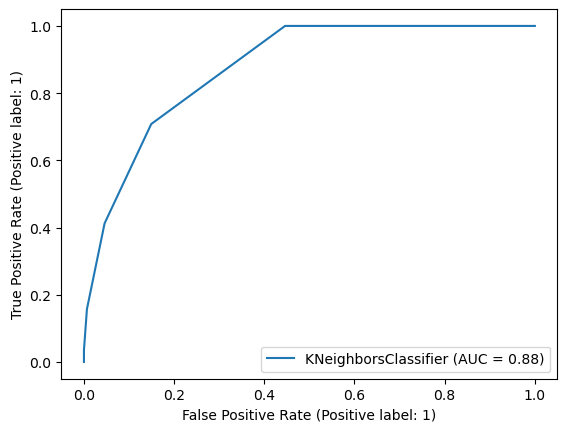

In [201]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [202]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.5945812903033215

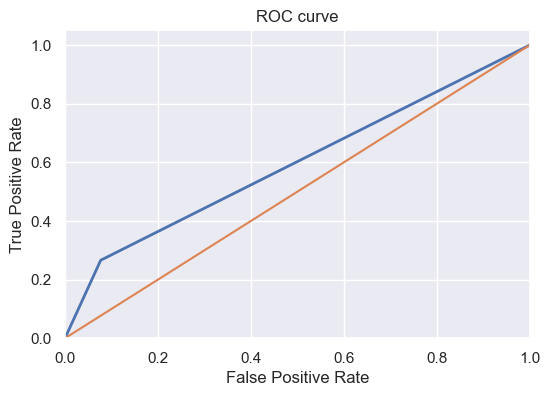

In [203]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()